# Configurações

## Importações

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

## Definição do Dataframe

In [18]:
iris = load_iris()

In [19]:
# Criar um DataFrame com as features (X)
# X contém as características das flores (comprimento/largura da sépala e pétala)
X = pd.DataFrame(data=iris.data, columns=iris.feature_names)
# Criar uma Series com os rótulos (y) - vamos usá-los APENAS para comparação posterior
# O K-Means não terá acesso a 'y' durante o treinamento.
y = pd.Series(iris.target)

print("Dataset Iris carregado com sucesso!")

Dataset Iris carregado com sucesso!


# Conhecendo as Features

In [20]:
print(f"Formato das features (X): {X.shape}")
print(f"Formato dos rótulos (y): {y.shape}")
print(f"Nomes das espécies (rótulos reais): {iris.target_names}\n")

Formato das features (X): (150, 4)
Formato dos rótulos (y): (150,)
Nomes das espécies (rótulos reais): ['setosa' 'versicolor' 'virginica']



In [21]:
print("Primeiras 5 linhas das features (X):")
X.head()

Primeiras 5 linhas das features (X):


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


# Pré-Processamento

In [22]:
# Instanciar o StandardScaler
scaler = StandardScaler()
# Ajustar o scaler aos dados e transformar X
# Agora X_scaled terá média 0 e desvio padrão 1 para cada feature
X_scaled = scaler.fit_transform(X)
# Opcional: Converter de volta para DataFrame para manter os nomes das colunas
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
print("Features escaladas com sucesso.")
print("Primeiras 5 linhas das features escaladas:")
print(X_scaled_df.head())

Features escaladas com sucesso.
Primeiras 5 linhas das features escaladas:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0          -0.900681          1.019004          -1.340227         -1.315444
1          -1.143017         -0.131979          -1.340227         -1.315444
2          -1.385353          0.328414          -1.397064         -1.315444
3          -1.506521          0.098217          -1.283389         -1.315444
4          -1.021849          1.249201          -1.340227         -1.315444


# Modelagem

## Treinamento

In [23]:
# Instanciar o modelo K-Means
# n_clusters=3: Queremos que o algoritmo encontre 3 grupos.
# random_state=42: Garante que os resultados sejam os mesmos cada vez que você rodar o código.
# n_init='auto': É uma prática recomendada para o Scikit-learn versão >= 1.2
kmeans = KMeans(n_clusters=3, random_state=42, n_init='auto')
# Treinar o modelo K-Means nos dados escalados (X_scaled) e obter os rótulos dos clusters
# O método .fit_predict() treina o modelo e retorna o cluster atribuído a cada ponto.
kmeans_labels = kmeans.fit_predict(X_scaled)
print("Algoritmo K-Means treinado e clusters atribuídos com sucesso!")
print("\nPrimeiros 10 rótulos de cluster atribuídos pelo K-Means:")

print(kmeans_labels[:10])
print("\nCentróides dos clusters (coordenadas no espaço de features escalado):\n")
print(kmeans.cluster_centers_)

Algoritmo K-Means treinado e clusters atribuídos com sucesso!

Primeiros 10 rótulos de cluster atribuídos pelo K-Means:
[1 2 2 2 1 1 1 1 2 2]

Centróides dos clusters (coordenadas no espaço de features escalado):

[[ 0.57100359 -0.37176778  0.69111943  0.66315198]
 [-0.81623084  1.31895771 -1.28683379 -1.2197118 ]
 [-1.32765367 -0.373138   -1.13723572 -1.11486192]]


## Convertendo para o original

In [24]:
# Instanciar o PCA para reduzir para 2 componentes principais
pca = PCA(n_components=2)
# Ajustar o PCA aos dados escalados e transformar os dados
# X_pca agora contém os dados originais projetados em 2 dimensões.
X_pca = pca.fit_transform(X_scaled)
print("\nDados reduzidos para 2 dimensões com PCA.")
print(f"Formato dos dados após PCA: {X_pca.shape}\n")
# Verificar a proporção da variância explicada pelos 2 primeiros componentes
# Isso indica quanta "informação" original dos dados foi retida.
print(f"Variância explicada pelos 2 primeiros componentes principais: {pca.explained_variance_ratio_.sum():.2f}")


Dados reduzidos para 2 dimensões com PCA.
Formato dos dados após PCA: (150, 2)

Variância explicada pelos 2 primeiros componentes principais: 0.96


## Visualização dos dados

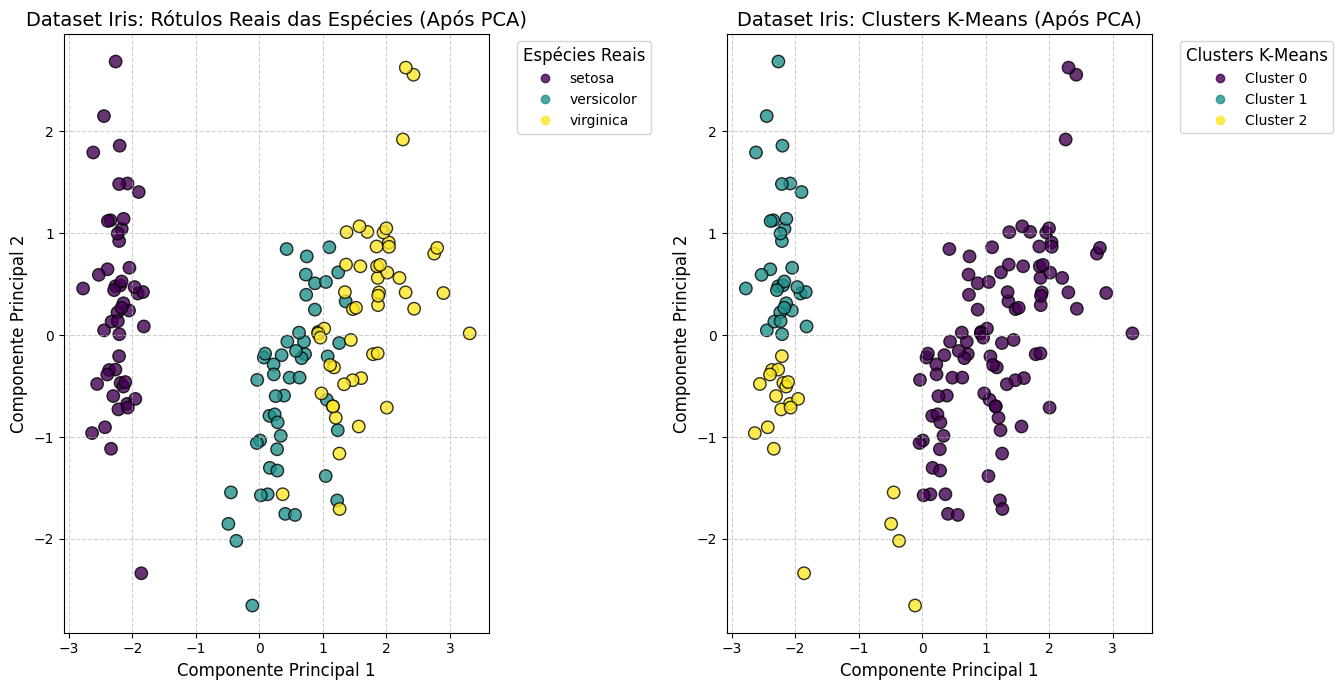

In [25]:
plt.figure(figsize=(16, 7)) # Aumentar o tamanho da figura para melhor visualização
# --- Gráfico 1: Rótulos Reais das Espécies (Para Comparação) ---
plt.subplot(1, 2, 1) # Define que teremos 1 linha, 2 colunas e este é o 1o gráfico
scatter1 = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', s=80, alpha=0.8, edgecolor='k')
plt.title('Dataset Iris: Rótulos Reais das Espécies (Após PCA)', fontsize=14)
plt.xlabel('Componente Principal 1', fontsize=12)
plt.ylabel('Componente Principal 2', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
# Gerar handles e rótulos padrão do scatter para a legenda
handles, default_labels = scatter1.legend_elements()
# Mapear os rótulos numéricos (0, 1, 2) para os nomes das espécies ('setosa', 'versicolor', 'virginica')
# É necessário tratar a formatação LaTeX que legend_elements() pode aplicar ('$\mathdefault{0}$')
custom_labels_real = [iris.target_names[int(label_val.replace('$\\mathdefault{', '').replace('}$', ''))] for label_val in default_labels]
legend1 = plt.legend(handles=handles, labels=custom_labels_real, title="Espécies Reais", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10, title_fontsize=12)

# --- Gráfico 2: Clusters Encontrados pelo K-Means ---
plt.subplot(1, 2, 2) # Define que teremos 1 linha, 2 colunas e este é o 2o gráfico
scatter2 = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels,
cmap='viridis', s=80, alpha=0.8, edgecolor='k')
plt.title('Dataset Iris: Clusters K-Means (Após PCA)', fontsize=14)
plt.xlabel('Componente Principal 1', fontsize=12)
plt.ylabel('Componente Principal 2', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
# Gerar handles e rótulos padrão do scatter para a legenda do K-Means
handles_kmeans, default_labels_kmeans = scatter2.legend_elements()

# Mapear os rótulos numéricos para nomes de clusters ('Cluster 0', 'Cluster 1', 'Cluster 2')
custom_labels_kmeans = [f'Cluster {label_val.replace("$\\mathdefault{", "").replace("}$", "")}' for label_val in default_labels_kmeans]
legend2 = plt.legend(handles=handles_kmeans, labels=custom_labels_kmeans, title="Clusters K-Means", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10, title_fontsize=12)
plt.tight_layout(rect=[0, 0, 0.85, 1]) # Ajustar layout para evitar sobreposição da legenda
plt.show()